In [216]:
# ! python -m venv .NBA_venv #creo entorno virtual

In [217]:
#activo el entorno
! .NBA_venv\Scripts\activate 

In [218]:
#compuebo si estoy trabajando en el entorno
! where python  

c:\Users\ERBC\Desktop\curso henry\Analisis_evolutivo_NBA\Analisis_evolutivo_NBA\.NBA_venv\Scripts\python.exe
C:\Users\ERBC\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\ERBC\AppData\Local\Microsoft\WindowsApps\python.exe


In [219]:
! pip install pandas numpy
! pip freeze > requirements.txt

In [220]:
import pandas as pd
import numpy as np

In [221]:
archivo_player_info = r"C:\Users\ERBC\Desktop\curso henry\Analisis_evolutivo_NBA\Analisis_evolutivo_NBA\datasets\common_player_info.csv" #se asigna la ruta a una variable
player__info_original = pd.read_csv(archivo_player_info) #carga del archivo en un df de pandas

In [222]:
player__info_original.info()
player__info_original.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   person_id                         4171 non-null   int64  
 1   first_name                        4171 non-null   object 
 2   last_name                         4171 non-null   object 
 3   display_first_last                4171 non-null   object 
 4   display_last_comma_first          4171 non-null   object 
 5   display_fi_last                   4171 non-null   object 
 6   player_slug                       4171 non-null   object 
 7   birthdate                         4171 non-null   object 
 8   school                            4156 non-null   object 
 9   country                           4170 non-null   object 
 10  last_affiliation                  4171 non-null   object 
 11  height                            4075 non-null   object 
 12  weight

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,...,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,...,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,...,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,...,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,...,HISTADD_tom_abernethy,1976.0,1980.0,N,Y,Y,1976,3,43,N


In [223]:
# Convertir birthdate a datetime
player__info_original['birthdate'] = pd.to_datetime(player__info_original['birthdate'], errors='coerce')
player__info_original.tail(3)

,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
4168,78647,Jim,Zoet,Jim Zoet,"Zoet, Jim",J. Zoet,jim-zoet,1953-12-30,Kent State,USA,...,HISTADD_jim_zoet,1982.0,1982.0,N,Y,Y,Undrafted,Undrafted,Undrafted,N
4169,1627826,Ivica,Zubac,Ivica Zubac,"Zubac, Ivica",I. Zubac,ivica-zubac,1997-03-18,Mega Basket,Croatia,...,ivica_zubac,2016.0,2023.0,Y,Y,Y,2016,2,32,N
4170,78650,Matt,Zunic,Matt Zunic,"Zunic, Matt",M. Zunic,matt-zunic,1919-12-19,George Washington,USA,...,HISTADD_matt_zunic,1948.0,1948.0,N,Y,Y,1947,NaN,NaN,N


In [224]:
# Mostrar valores nulos por columna
print(player__info_original.isnull().sum())

person_id                             0
first_name                            0
last_name                             0
display_first_last                    0
display_last_comma_first              0
display_fi_last                       0
player_slug                           0
birthdate                             0
school                               15
country                               1
last_affiliation                      0
height                               96
weight                              100
season_exp                            0
jersey                              980
position                             63
rosterstatus                          0
games_played_current_season_flag      0
team_id                               0
team_name                           702
team_abbreviation                   702
team_code                           702
team_city                           702
playercode                            1
from_year                            15


school (15 nulos).
country (1 nulo).
height (96 nulos).
weight (100 nulos).
jersey (980 nulos).
position (63 nulos).
team_* (team_name, team_abbreviation, team_code, team_city) (702 nulos en total).
draft_round (164 nulos).
draft_number (223 nulos).

In [225]:
# Ejemplo: Rellenar valores faltantes en `country` con "Unknown"
player__info_original['country'].fillna('Unknown', inplace=True)


C:\Users\ERBC\AppData\Local\Temp\ipykernel_9064\1643369829.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player__info_original['country'].fillna('Unknown', inplace=True)


In [226]:
player__info_original['team_name'].fillna('Unknown', inplace=True)
player__info_original['team_abbreviation'].fillna('Unknown', inplace=True)
player__info_original['team_code'].fillna('Unknown', inplace=True)
player__info_original['team_city'].fillna('Unknown', inplace=True)
player__info_original['school'].fillna('Unknown', inplace=True)
player__info_original['jersey'].fillna('Unknown', inplace=True)
player__info_original['position'].fillna('Unknown', inplace=True)

C:\Users\ERBC\AppData\Local\Temp\ipykernel_9064\3509145137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player__info_original['team_name'].fillna('Unknown', inplace=True)
C:\Users\ERBC\AppData\Local\Temp\ipykernel_9064\3509145137.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [227]:
print(player__info_original.isnull().sum())

person_id                             0
first_name                            0
last_name                             0
display_first_last                    0
display_last_comma_first              0
display_fi_last                       0
player_slug                           0
birthdate                             0
school                                0
country                               0
last_affiliation                      0
height                               96
weight                              100
season_exp                            0
jersey                                0
position                              0
rosterstatus                          0
games_played_current_season_flag      0
team_id                               0
team_name                             0
team_abbreviation                     0
team_code                             0
team_city                             0
playercode                            1
from_year                            15


In [228]:
# Función para convertir el formato "6-7" a pulgadas o centímetros
def convert_height_to_cm(height):
    try:
        if isinstance(height, str) and '-' in height:  # Si contiene un guion
            feet, inches = height.split('-')  # Separar por el guion
            # Convertir a centímetros (1 pie = 30.48 cm, 1 pulgada = 2.54 cm)
            return int(feet) * 30.48 + int(inches) * 2.54
        else:
            return np.nan  # Devolver NaN si el formato no es válido
    except:
        return np.nan  # Devolver NaN si ocurre un error

# Aplicar la conversión a la columna 'height'
player__info_original['height'] = player__info_original['height'].apply(convert_height_to_cm)

# Verificar el resultado
print(player__info_original[['height', 'height']].head())

   height  height
0  208.28  208.28
1  218.44  218.44
2  198.12  198.12
3  205.74  205.74
4  200.66  200.66


In [229]:
# Calcular el promedio de la columna 'height', ignorando los valores nulos
average_height = player__info_original['height'].mean()

# Rellenar los valores nulos con el promedio
player__info_original['height'].fillna(average_height, inplace=True)

# Calcular el promedio de la columna 'weight'
average_weight = player__info_original['weight'].mean()

# Rellenar los valores nulos con el promedio
player__info_original['weight'].fillna(average_weight, inplace=True)

C:\Users\ERBC\AppData\Local\Temp\ipykernel_9064\2555309832.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player__info_original['height'].fillna(average_height, inplace=True)
C:\Users\ERBC\AppData\Local\Temp\ipykernel_9064\2555309832.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [230]:
print(player__info_original.isnull().sum())

person_id                             0
first_name                            0
last_name                             0
display_first_last                    0
display_last_comma_first              0
display_fi_last                       0
player_slug                           0
birthdate                             0
school                                0
country                               0
last_affiliation                      0
height                                0
weight                                0
season_exp                            0
jersey                                0
position                              0
rosterstatus                          0
games_played_current_season_flag      0
team_id                               0
team_name                             0
team_abbreviation                     0
team_code                             0
team_city                             0
playercode                            1
from_year                            15


In [231]:
player__info_original['playercode'] = player__info_original['playercode'].fillna('Unknown')
player__info_original['from_year'] = player__info_original['from_year'].fillna(0)
player__info_original['to_year'] = player__info_original['to_year'].fillna(0)
player__info_original['draft_round'] = player__info_original['draft_round'].fillna('Unknown')
player__info_original['draft_number'] = player__info_original['draft_number'].fillna('Unknown')
print(player__info_original.isnull().sum())

person_id                           0
first_name                          0
last_name                           0
display_first_last                  0
display_last_comma_first            0
display_fi_last                     0
player_slug                         0
birthdate                           0
school                              0
country                             0
last_affiliation                    0
height                              0
weight                              0
season_exp                          0
jersey                              0
position                            0
rosterstatus                        0
games_played_current_season_flag    0
team_id                             0
team_name                           0
team_abbreviation                   0
team_code                           0
team_city                           0
playercode                          0
from_year                           0
to_year                             0
dleague_flag

In [232]:
for i in player__info_original.columns: #recorremos cada columna del data drame y calculamos con describe las estadisticas basicas segun el tipo de dato de la columna
    print(i)
    print(player__info_original[i].describe().round(2)) #con round lo redondeo a dos decimales
    print("-----------------------------------------")

person_id
count       4171.00
mean      332750.86
std       576888.64
min            2.00
25%        76128.50
50%        77593.00
75%       202274.50
max      1631347.00
Name: person_id, dtype: float64
-----------------------------------------
first_name
count     4171
unique    1434
top       John
freq        77
Name: first_name, dtype: object
-----------------------------------------
last_name
count         4171
unique        2576
top       Williams
freq            67
Name: last_name, dtype: object
-----------------------------------------
display_first_last
count               4171
unique              4139
top       George Johnson
freq                   3
Name: display_first_last, dtype: object
-----------------------------------------
display_last_comma_first
count                4171
unique               4139
top       Johnson, George
freq                    3
Name: display_last_comma_first, dtype: object
-----------------------------------------
display_fi_last
count            4

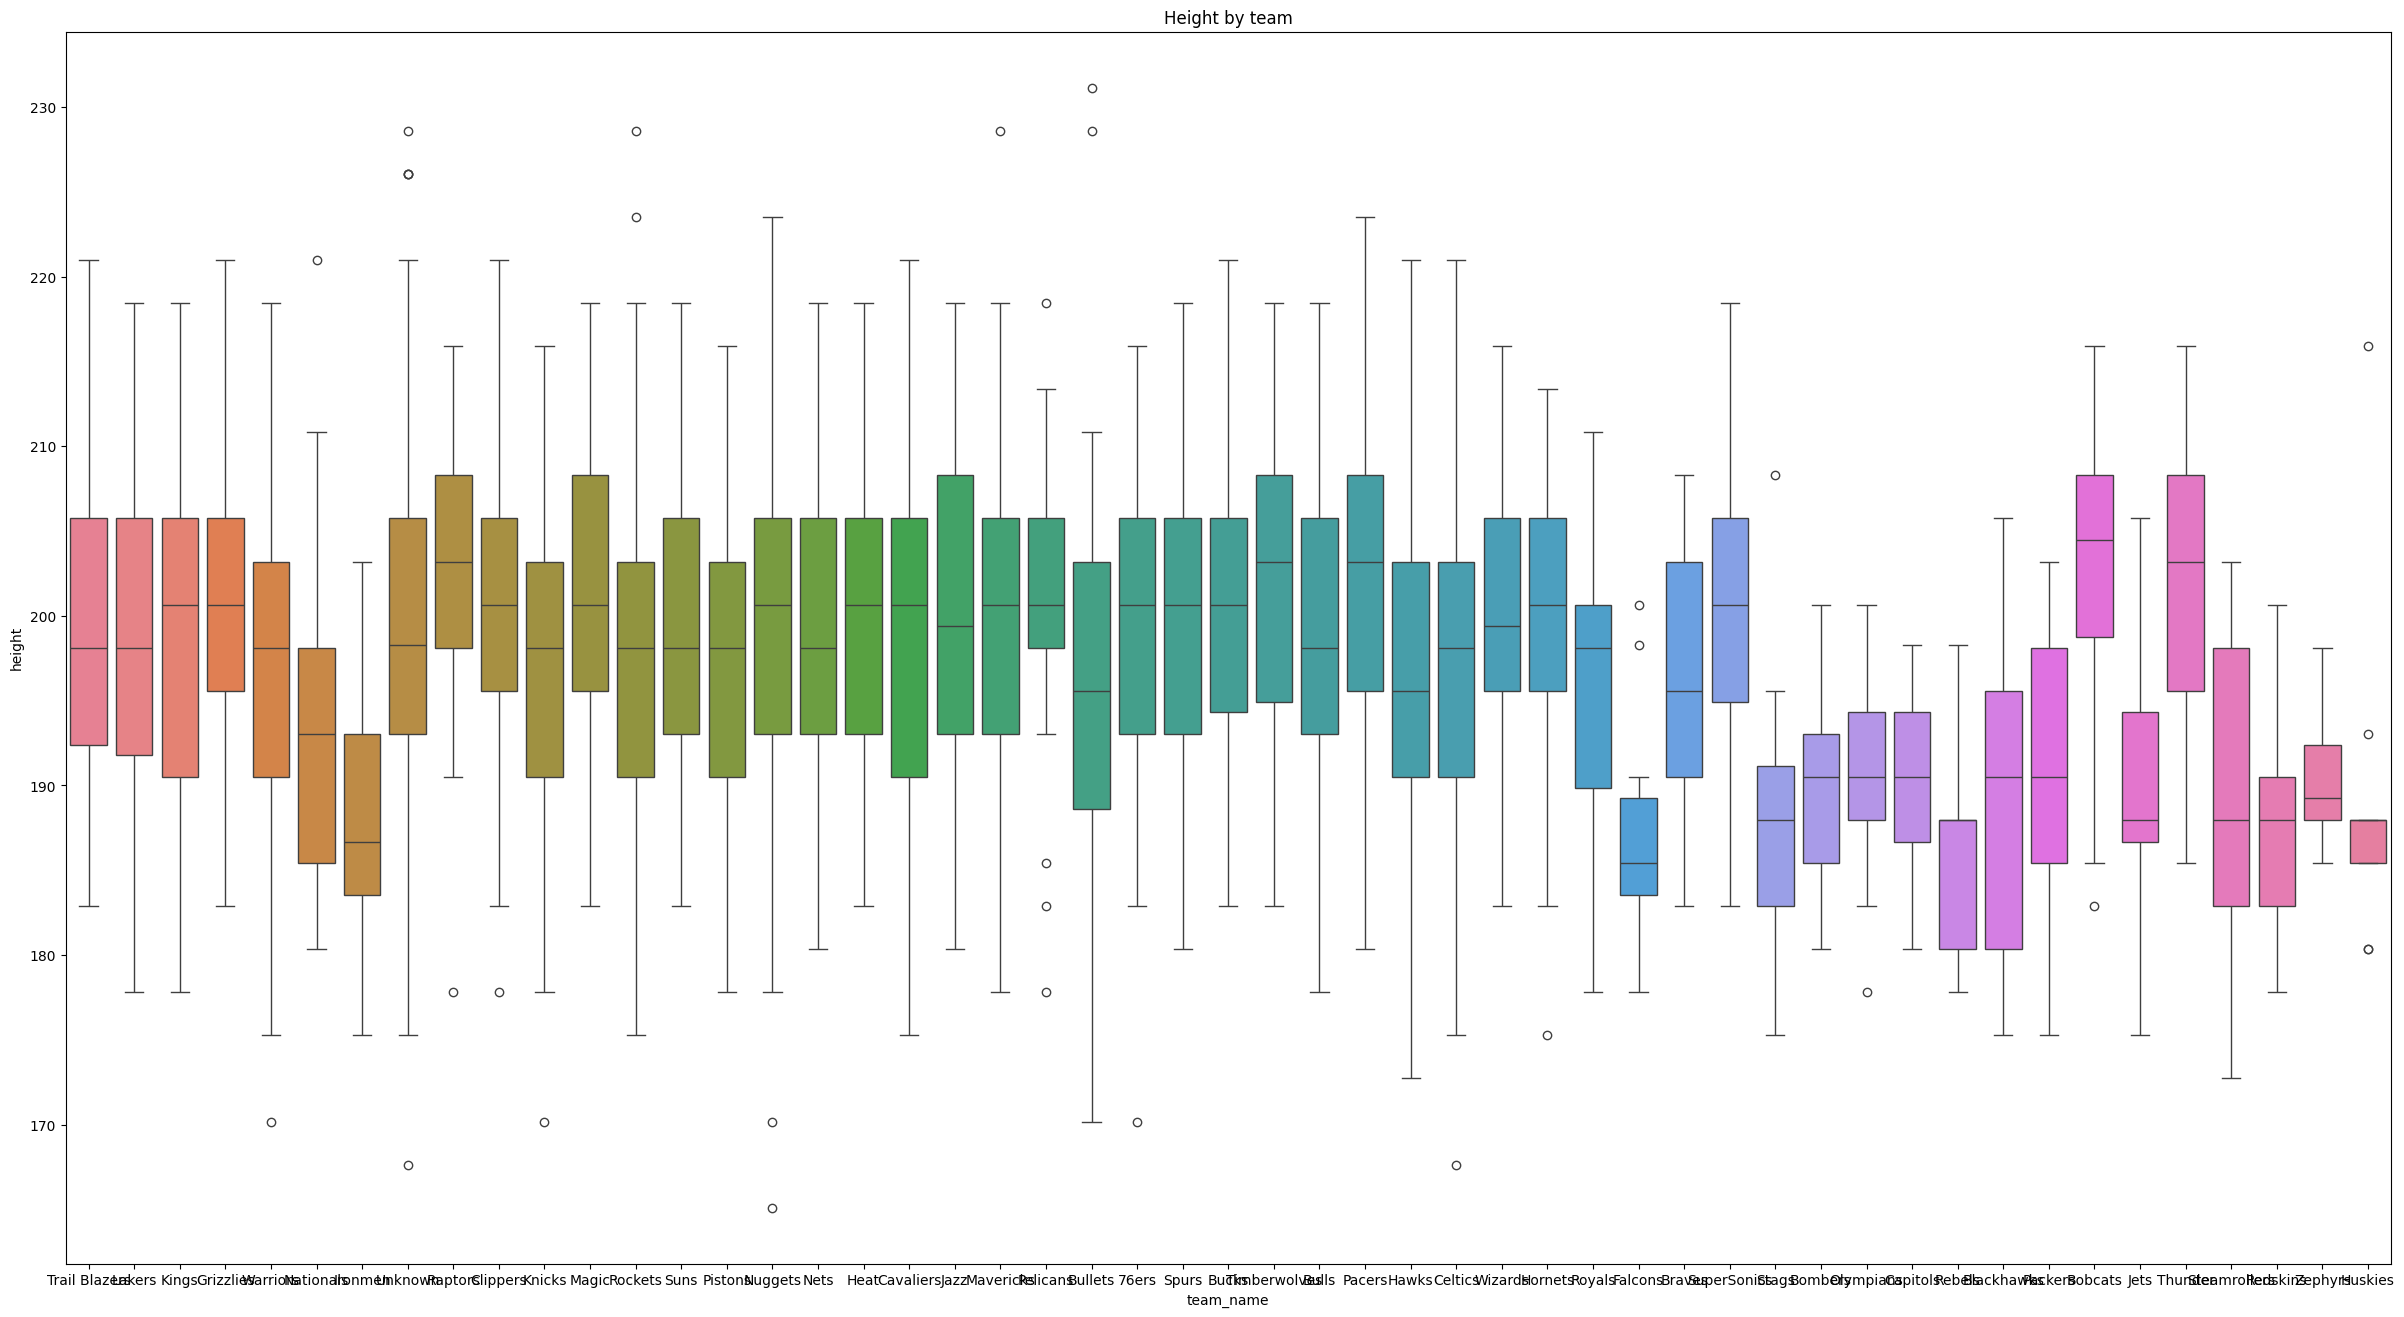

In [233]:
! pip install seaborn matplotlib

import matplotlib.pyplot as plt #importo solo el componente pyplot  y no toda la libreria
import seaborn as sns
! pip freeze > requirements.txt #crea txt con los requerimientos

fig, ax = plt.subplots(figsize=(30, 16))
sns.boxplot(x='team_name', y='height', data=player__info_original, hue='team_name') #Usa la función boxplot de Seaborn para crear el gráfico de cajas y bigotes.




plt.title('Height by team')
plt.show()

In [234]:
#guardamos el data frame como csv
player__info_original.to_csv("player_info_filtrado_limpio.csv",index=False)

In [235]:
archivo_draft_combine_stats_original = r"C:\Users\ERBC\Desktop\curso henry\Analisis_evolutivo_NBA\Analisis_evolutivo_NBA\datasets\draft_combine_stats.csv" #se asigna la ruta a una variable
draft_combine_stats_original = pd.read_csv(archivo_draft_combine_stats_original) #carga del archivo en un df de pandas
draft_combine_stats_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        1202 non-null   int64  
 1   player_id                     1202 non-null   int64  
 2   first_name                    1202 non-null   object 
 3   last_name                     1202 non-null   object 
 4   player_name                   1202 non-null   object 
 5   position                      1197 non-null   object 
 6   height_wo_shoes               1153 non-null   float64
 7   height_wo_shoes_ft_in         1153 non-null   object 
 8   height_w_shoes                1008 non-null   float64
 9   height_w_shoes_ft_in          1008 non-null   object 
 10  weight                        1152 non-null   float64
 11  wingspan                      1153 non-null   float64
 12  wingspan_ft_in                1153 non-null   object 
 13  sta

In [236]:
draft_combine_stats_original

,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,2001,12033,Adam,Allenspach,Adam Allenspach,C,83.50,6' 11.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2240,Gilbert,Arenas,Gilbert Arenas,SG,74.25,6' 2.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,2220,Brandon,Armstrong,Brandon Armstrong,SG,75.50,6' 3.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,2203,Shane,Battier,Shane Battier,SF-PF,80.25,6' 8.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,12034,Cookie,Belcher,Cookie Belcher,SG-PG,75.00,6' 3'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2023,1641705,Victor,Wembanyama,Victor Wembanyama,C,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198,2023,1641727,Dariq,Whitehead,Dariq Whitehead,SG,77.75,6' 5.75'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199,2023,1641715,Cam,Whitmore,Cam Whitmore,SF,77.75,6' 5.75'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,2023,1630592,Jalen,Wilson,Jalen Wilson,SF,77.50,6' 5.50'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18-30,NaN,NaN,NaN,14-25


In [237]:
# Separar los valores en pies y pulgadas
height_split = draft_combine_stats_original['height_wo_shoes_ft_in'].str.extract(r"(?P<feet>\d+)\s*'\s*(?P<inches>\d+\.?\d*)\s*''")

# Convertir las partes a numéricas
height_split['feet'] = pd.to_numeric(height_split['feet'], errors='coerce')
height_split['inches'] = pd.to_numeric(height_split['inches'], errors='coerce')
#height_split

# Calcular la altura en cm
draft_combine_stats_original['height_wo_shoes_ft_in'] = (height_split['feet'] * 30.48) + (height_split['inches'] * 2.54)

#promedio para valores nulos

average_height_wo_shoes = draft_combine_stats_original['height_wo_shoes_ft_in'].mean()

#relleno con el promedio

draft_combine_stats_original['height_wo_shoes_ft_in'] = draft_combine_stats_original['height_wo_shoes_ft_in'].fillna(average_height_wo_shoes).round(2)


draft_combine_stats_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        1202 non-null   int64  
 1   player_id                     1202 non-null   int64  
 2   first_name                    1202 non-null   object 
 3   last_name                     1202 non-null   object 
 4   player_name                   1202 non-null   object 
 5   position                      1197 non-null   object 
 6   height_wo_shoes               1153 non-null   float64
 7   height_wo_shoes_ft_in         1202 non-null   float64
 8   height_w_shoes                1008 non-null   float64
 9   height_w_shoes_ft_in          1008 non-null   object 
 10  weight                        1152 non-null   float64
 11  wingspan                      1153 non-null   float64
 12  wingspan_ft_in                1153 non-null   object 
 13  sta

In [238]:
draft_combine_stats_original

,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,2001,12033,Adam,Allenspach,Adam Allenspach,C,83.50,212.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2240,Gilbert,Arenas,Gilbert Arenas,SG,74.25,188.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,2220,Brandon,Armstrong,Brandon Armstrong,SG,75.50,191.77,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,2203,Shane,Battier,Shane Battier,SF-PF,80.25,203.84,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,12034,Cookie,Belcher,Cookie Belcher,SG-PG,75.00,190.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2023,1641705,Victor,Wembanyama,Victor Wembanyama,C,NaN,197.03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198,2023,1641727,Dariq,Whitehead,Dariq Whitehead,SG,77.75,197.48,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199,2023,1641715,Cam,Whitmore,Cam Whitmore,SF,77.75,197.48,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,2023,1630592,Jalen,Wilson,Jalen Wilson,SF,77.50,196.85,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18-30,NaN,NaN,NaN,14-25


In [239]:
# trabajar con height_wo_shoes
average_height_wo = draft_combine_stats_original['height_wo_shoes'].mean().round(2)
draft_combine_stats_original['height_wo_shoes'] = draft_combine_stats_original['height_wo_shoes'].fillna(average_height_wo)
draft_combine_stats_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        1202 non-null   int64  
 1   player_id                     1202 non-null   int64  
 2   first_name                    1202 non-null   object 
 3   last_name                     1202 non-null   object 
 4   player_name                   1202 non-null   object 
 5   position                      1197 non-null   object 
 6   height_wo_shoes               1202 non-null   float64
 7   height_wo_shoes_ft_in         1202 non-null   float64
 8   height_w_shoes                1008 non-null   float64
 9   height_w_shoes_ft_in          1008 non-null   object 
 10  weight                        1152 non-null   float64
 11  wingspan                      1153 non-null   float64
 12  wingspan_ft_in                1153 non-null   object 
 13  sta

In [240]:
#ELiminar columnas con muchisimos datos nulos
columns_to_drop = [
    'spot_fifteen_corner_left', 'spot_fifteen_break_left', 'spot_fifteen_top_key',
    'spot_fifteen_break_right', 'spot_fifteen_corner_right', 'spot_college_corner_left',
    'spot_college_break_left', 'spot_college_top_key', 'spot_college_break_right',
    'spot_college_corner_right', 'spot_nba_corner_left', 'spot_nba_break_left',
    'spot_nba_top_key', 'spot_nba_break_right', 'spot_nba_corner_right',
    'off_drib_fifteen_break_left', 'off_drib_fifteen_top_key', 'off_drib_fifteen_break_right',
    'off_drib_college_break_left', 'off_drib_college_top_key', 'off_drib_college_break_right',
    'on_move_fifteen', 'on_move_college'
]
draft_combine_stats_original.drop(columns=columns_to_drop, inplace=True)



In [241]:
draft_combine_stats_original.info()
draft_combine_stats_original.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season                      1202 non-null   int64  
 1   player_id                   1202 non-null   int64  
 2   first_name                  1202 non-null   object 
 3   last_name                   1202 non-null   object 
 4   player_name                 1202 non-null   object 
 5   position                    1197 non-null   object 
 6   height_wo_shoes             1202 non-null   float64
 7   height_wo_shoes_ft_in       1202 non-null   float64
 8   height_w_shoes              1008 non-null   float64
 9   height_w_shoes_ft_in        1008 non-null   object 
 10  weight                      1152 non-null   float64
 11  wingspan                    1153 non-null   float64
 12  wingspan_ft_in              1153 non-null   object 
 13  standing_reach              1152 

season                          0
player_id                       0
first_name                      0
last_name                       0
player_name                     0
height_wo_shoes                 0
height_wo_shoes_ft_in           0
position                        5
wingspan                       49
wingspan_ft_in                 49
standing_reach                 50
weight                         50
standing_reach_ft_in           50
max_vertical_leap             185
standing_vertical_leap        185
three_quarter_sprint          190
height_w_shoes_ft_in          194
height_w_shoes                194
lane_agility_time             194
body_fat_pct                  199
bench_press                   394
hand_width                    483
hand_length                   483
modified_lane_agility_time    791
dtype: int64

In [244]:
#rellenar nulos de columnas con pocos valores faltantes con la mediana
# Lista de columnas críticas
columns_to_fill = ['wingspan', 'weight', 'standing_reach', 'max_vertical_leap', 
                   'standing_vertical_leap', 'three_quarter_sprint', 'body_fat_pct', 
                   'lane_agility_time', 'height_w_shoes']

# Rellenar los valores nulos con la mediana
for column in columns_to_fill:
    median_value = draft_combine_stats_original[column].median()
    draft_combine_stats_original[column] = draft_combine_stats_original[column].fillna(median_value)
draft_combine_stats_original.isnull().sum().sort_values()

season                          0
player_id                       0
first_name                      0
last_name                       0
player_name                     0
height_wo_shoes                 0
height_wo_shoes_ft_in           0
height_w_shoes                  0
body_fat_pct                    0
weight                          0
wingspan                        0
standing_reach                  0
lane_agility_time               0
three_quarter_sprint            0
standing_vertical_leap          0
max_vertical_leap               0
position                        5
wingspan_ft_in                 49
standing_reach_ft_in           50
height_w_shoes_ft_in          194
bench_press                   394
hand_width                    483
hand_length                   483
modified_lane_agility_time    791
dtype: int64